Libraries importing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Loading the Data

In [2]:
# Load the dataset
data = pd.read_csv('data.csv')
testdata = pd.read_csv('test_data.csv')
# Display the first few rows of the dataset
print(data.head())


    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0       NaN     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

 Data Preprocessing

In [3]:
# Check for missing values
print(data.isnull().sum())
# Fill missing values if any (for simplicity, using mean of the columns here)
data = data.fillna(data.mean())
# Separate features and target variable
X_train = data.drop('Disease', axis=1)
y_train = data['Disease']

X_test = testdata.drop('Disease', axis=1)
y_test = testdata['Disease']

disease_classes = y_train.unique()  # Assuming all disease classes are present in the training set
# Define the mapping dictionary
mapping = {disease_class: 1 for disease_class in disease_classes}

# Apply the mapping to both the training and test target variables
y_train = y_train.apply(lambda x: 0 if x == 'Healthy' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'Healthy' else 1)

# Display the encoded target variables
print("Encoded y_train:")
print(y_train)

print("\nEncoded y_test:")
print(y_test)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#  will have a mean of 0 and a standard deviation of 1 after transformation.


Glucose                                      1
Cholesterol                                  0
Hemoglobin                                   2
Platelets                                    2
White Blood Cells                            1
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              1
HDL Cholesterol                              1
ALT                                          4
AST                                          0
Heart Rate                                   8
Creatinine   

C:\Users\HIMA\AppData\Local\Temp\ipykernel_14376\649270057.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Building and Training the Model

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM base estimator
base_estimator = SVC(kernel='linear', probability=True) 
# Initialize the AdaBoost classifier with SVM as the base estimator
adaboost_svm_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
# Train the AdaBoost classifier
adaboost_svm_classifier.fit(X_train, y_train)



c:\Users\HIMA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   random_state=42)

Making Predictions and Evaluating the Model

Accuracy: 98.97%
Precision: 97.95%
Recall: 98.97%
F1 Score: 98.46%


c:\Users\HIMA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


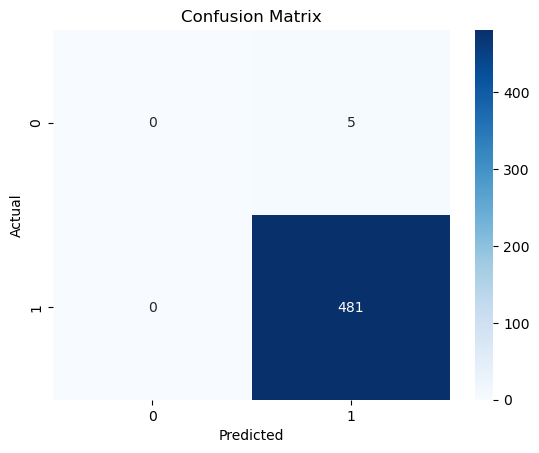

In [6]:
# Make predictions on the test set
y_pred = adaboost_svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')       
f1 = f1_score(y_test, y_pred, average='weighted')  

# Display the metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision* 100:.2f}%')
print(f'Recall: {recall* 100:.2f}%')
print(f'F1 Score: {f1* 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
